<a href="https://colab.research.google.com/github/knowledge-intelligence/tips-for-kime/blob/main/ETC-Python/Examples_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sympy - Symbolic algebra in Python

J.R. Johansson (jrjohansson at gmail.com)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *

To get nice-looking $\LaTeX$ formatted output run:

In [ ]:
init_printing()

# or with older versions of sympy/ipython, load the IPython extension
#%load_ext sympy.interactive.ipythonprinting
# or
#%load_ext sympyprinting

## Symbolic variables

In [ ]:
x = Symbol('x')

In [ ]:
(pi + x)**2

In [ ]:
# alternative way of defining symbols
a, b, c = symbols("a, b, c")

In [ ]:
type(a)

sympy.core.symbol.Symbol

We can add assumptions to symbols when we create them:

In [ ]:
x = Symbol('x', real=True)

In [ ]:
x.is_imaginary

False

In [ ]:
x = Symbol('x', positive=True)

In [ ]:
x > 0

The imaginary unit is denoted `I` in Sympy. 

In [ ]:
1+1*I

In [ ]:
I**2

In [ ]:
(x * I + 1)**2

### Rational numbers
There are three different numerical types in SymPy: `Real`, `Rational`, `Integer`: 

In [ ]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [ ]:
r1

In [ ]:
r1+r2

In [ ]:
r1/r2

## Numerical evaluation
SymPy uses a library for artitrary precision as numerical backend, and has predefined SymPy expressions for a number of mathematical constants, such as: `pi`, `e`, `oo` for infinity.

To evaluate an expression numerically we can use the `evalf` function (or `N`). It takes an argument `n` which specifies the number of significant digits.

In [ ]:
pi.evalf(n=50)

In [ ]:
y = (x + pi)**2

In [ ]:
N(y, 5) # same as evalf

When we numerically evaluate algebraic expressions we often want to substitute a symbol with a numerical value. In SymPy we do that using the `subs` function:

In [ ]:
y.subs(x, 1.5)

In [ ]:
N(y.subs(x, 1.5))

The `subs` function can of course also be used to substitute Symbols and expressions:

In [ ]:
y.subs(x, a+pi)

We can also combine numerical evolution of expressions with NumPy arrays:

In [ ]:
import numpy

In [ ]:
x_vec = numpy.arange(0, 10, 0.1)

In [ ]:
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

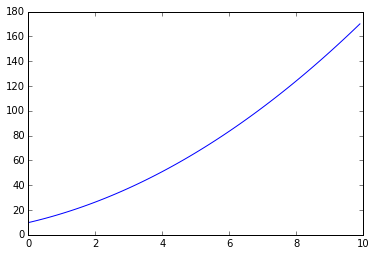

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec);

However, this kind of numerical evolution can be very slow, and there is a much more efficient way to do it: Use the function `lambdify` to "compile" a Sympy expression into a function that is much more efficient to evaluate numerically:

In [ ]:
f = lambdify([x], (x + pi)**2, 'numpy')  # the first argument is a list of variables that
                                         # f will be a function of: in this case only x -> f(x)

In [ ]:
y_vec = f(x_vec)  # now we can directly pass a numpy array and f(x) is efficiently evaluated

The speedup when using "lambdified" functions instead of direct numerical evaluation can be significant, often several orders of magnitude. Even in this simple example we get a significant speed up:

In [ ]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

10 loops, best of 3: 28.2 ms per loop


In [2]:
%%timeit

y_vec = f(x_vec)

NameError: name 'f' is not defined

## Algebraic manipulations

### Expand and factor
The first steps in an algebraic manipulation 

In [ ]:
(x+1)*(x+2)*(x+3)

In [ ]:
expand((x+1)*(x+2)*(x+3))

The `expand` function takes a number of keywords arguments which we can tell the functions what kind of expansions we want to have performed. For example, to expand trigonometric expressions, use the `trig=True` keyword argument:

In [ ]:
sin(a+b)

In [ ]:
expand(sin(a+b), trig=True)

The opposite a product expansion is of course factoring. The factor an expression in SymPy use the `factor` function: 

In [ ]:
factor(x**3 + 6 * x**2 + 11*x + 6)

### Simplify
The `simplify` tries to simplify an expression into a nice looking expression, using various techniques. More specific alternatives to the `simplify` functions also exists: `trigsimp`, `powsimp`, `logcombine`, etc. 

The basic usages of these functions are as follows:

In [ ]:
# simplify expands a product
simplify((x+1)*(x+2)*(x+3))

In [ ]:
# simplify uses trigonometric identities
simplify(sin(a)**2 + cos(a)**2)

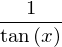

In [ ]:
simplify(cos(x)/sin(x))

### apart and together
To manipulate symbolic expressions of fractions, we can use the `apart` and `together` functions:

In [ ]:
f1 = 1/((a+1)*(a+2))

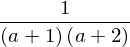

In [ ]:
f1

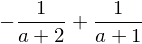

In [ ]:
apart(f1)

In [ ]:
f2 = 1/(a+2) + 1/(a+3)

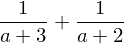

In [ ]:
f2

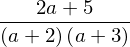

In [ ]:
together(f2)

## Calculus

### Differentiation

In [ ]:
y

In [ ]:
diff(y**2, x)

For higher order derivatives we can do:

In [ ]:
diff(y**2, x, x)

In [ ]:
diff(y**2, x, 2) # same as above

To calculate the derivative of a multivariate expression, we can do:

In [ ]:
x, y, z = symbols("x,y,z")

In [ ]:
f = sin(x*y) + cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [ ]:
diff(f, x, 1, y, 2)

## Integration

In [ ]:
f

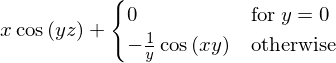

In [ ]:
integrate(f, x)

By providing limits for the integration variable we can evaluate definite integrals:

In [ ]:
integrate(f, (x, -1, 1))

In [ ]:
integrate(exp(-x**2), (x, -oo, oo))

Remember, `oo` is the SymPy notation for inifinity.

### Sums and products

In [ ]:
n = Symbol("n")

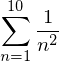

In [ ]:
Sum(1/n**2, (n, 1, 10))

In [ ]:
Sum(1/n**2, (n,1, 10)).evalf()

In [ ]:
Sum(1/n**2, (n, 1, oo)).evalf()

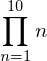

In [ ]:
Product(n, (n, 1, 10)) # 10!

## Linear algebra

### Matrices

Matrices are defined using the `Matrix` class:

In [ ]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

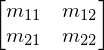

In [ ]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [ ]:
b = Matrix([[b1], [b2]])
b

With `Matrix` class instances we can do the usual matrix algebra operations:

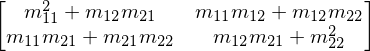

In [ ]:
A**2

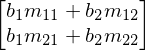

In [ ]:
A * b

And calculate determinants and inverses, and the like:

In [ ]:
A.det()

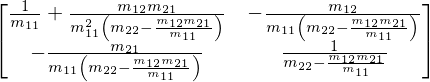

In [ ]:
A.inv()

## Solving equations

For solving equations and systems of equations we can use the `solve` function:

In [ ]:
solve(x**2 - 1, x)

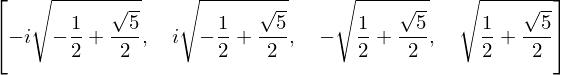

In [ ]:
solve(x**4 - x**2 - 1, x)

System of equations:

In [ ]:
solve([x + y - 1, x - y - 1], [x,y])

In terms of other symbolic expressions:

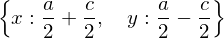

In [ ]:
solve([x + y - a, x - y - c], [x,y])

In [3]:
import numpy as np
from sympy.solvers import solve
from sympy import Symbol

x1 = Symbol('x1')
x2 = Symbol('x2')

f1 = 2*x1 - x2
f2 = 4*x2 + x1

solve((f1,f2), dict=True)

ModuleNotFoundError: No module named 'sympy'

## Further reading
* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.

## Versions

In [ ]:
%reload_ext version_information

%version_information numpy, matplotlib, sympy

Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.2.1
OS Darwin 14.1.0 x86_64 i386 64bit
numpy 1.9.2
matplotlib 1.4.3
sympy 0.7.6
Sat Aug 15 11:37:37 2015 JST